# Part 1

In [792]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
import sklearn

In [794]:
#reading csv from the web

data = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv")

In [795]:
data.shape

(1494926, 21)

 Answer - We have 1494926 rows and 21 columns in the data

In [796]:
#having a look at the data
data.head() 

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


# Part 2

In [801]:
#taking entries where trip distance is at least 1 mile
data = data[data['Trip_distance'] >= 1] 


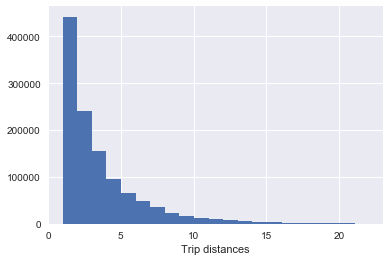

In [803]:
#Plotting histagram for trip distances
_ = plt.hist(data['Trip_distance'], bins = 600)
_ = plt.xlim(0,23)
_ = plt.xlabel('Trip distances')
plt.savefig('trip_hist')

Insights: 

- We see that the count for the trip distance decreases with the trip distance. 
- Most people travel for 0-5 miles. Modal distance lies somewhere between 0-4 miles. 
- There are very few people traveling farther than around 12 miles (Outliers).
- The data is unimodal.
- Asymmetrical data - The data is right skewed. 
- Since the modal distance is small, it seems like people are mostly taking taxis to travel within boroughs, instead of going to other boroughs and other states or outside of NYC. 



# Part 3


In [824]:
#converting pickup time column to datetime column
times = pd.to_datetime(data.lpep_pickup_datetime)

#converting the time to hour of the day and group by the hour, and finding the mean and median trip distances
print(data.groupby(times.dt.hour).Trip_distance.mean())
print(data.groupby(times.dt.hour).Trip_distance.median())

#following are the mean distances, followed by the medians


lpep_pickup_datetime
0     3.680187
1     3.617273
2     3.660717
3     3.844649
4     4.185005
5     4.840480
6     4.751463
7     3.965864
8     3.738962
9     3.715683
10    3.640688
11    3.604749
12    3.588875
13    3.566767
14    3.539186
15    3.526950
16    3.418987
17    3.297270
18    3.242676
19    3.291626
20    3.343581
21    3.582918
22    3.765448
23    3.764430
Name: Trip_distance, dtype: float64
lpep_pickup_datetime
0     2.730
1     2.700
2     2.710
3     2.800
4     3.000
5     3.580
6     3.520
7     2.840
8     2.660
9     2.680
10    2.600
11    2.500
12    2.500
13    2.460
14    2.430
15    2.400
16    2.350
17    2.300
18    2.310
19    2.380
20    2.415
21    2.600
22    2.750
23    2.780
Name: Trip_distance, dtype: float64


We can see the mean and median trip distances above. 
- We see that the mean distance is highest at 5 AM and median distance is highest at 5 AM as well.

Part b - Analyzing trips originating from and terminating at NYC area airports (JFK)

In [828]:
#Taking all trips with rate code ID 2 because these are the trips that originate from or end at the JFk airport.
df = data[data['RateCodeID'] == 2]

#counting the number of trips originating or ending at the JFK airport
print(len(df)) 

#Taking average of the fare amounts of airport trips
df['Total_amount'].mean() 

2559


64.003016803438854

Hence there are 2559 trips originating at or ending at the JFK airport- hence 2559 transactions fit this criteria.
The average total fare amount for these trips is ~$64
We could improve our analysis of airport trips by taking taking a rough estimate of the geo coordinates of the airport pick up locations and then filtering our rows by this criteria.

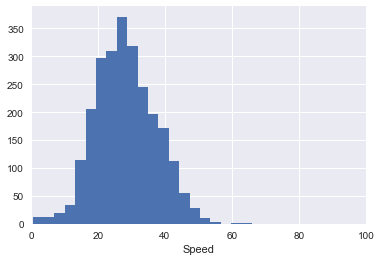

In [847]:
_ = plt.hist(df.speed,bins = 600)
plt.xlim(0,100)
plt.xlabel('Speed')

In the above plot, we can see an interesting feature for all the airport trips, that the speed follow a noral distribution - and the median as well as modal speed is around 30 miles per hour.

# Part 4

In [825]:
#data processing - 

#adding a tip percentage column which will be our target value
data['tip_percentage'] = (data['Tip_amount']/data['Total_amount'])*100

#removing infinite values from the tip percentage column
data = data[data['tip_percentage'] != float('inf')]


#converting the pickup and drop off time columns into datetime type columns
data['Lpep_dropoff_datetime'] = pd.to_datetime(data['Lpep_dropoff_datetime'])
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])



In [826]:
#adding a "trip_duration" column
data['trip_duration'] = round((((data['Lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.seconds)/3600),2) 

In [615]:
#adding a speed column for an extra feature
data['speed'] = data['Trip_distance']/data['trip_duration'] 


In [616]:
#adding a fare per mile column for an extra feature
data['fare_per_mi'] = data['Total_amount']/data['Trip_distance'] 

In [617]:
#adding pick up and drop hour columns as extra features
data['pickup_hour'] = (pd.to_datetime(data.lpep_pickup_datetime)).dt.hour
data['drop_hour'] = (pd.to_datetime(data.Lpep_dropoff_datetime)).dt.hour



In [618]:
#Only taking rows where tip amount is more than 0
data = data[data['Tip_amount'] > 0]

In [619]:
#removing rows in the fare per mile column with infinite values
data = data[data['fare_per_mi'] != float('inf')]


In [620]:
#removing infinite values from speed column
data = data[data['speed'] != float('inf')]

In [622]:
#dropping the Ehail_fee column
data= data.drop('Ehail_fee',axis=1)

In [624]:
#dropping the null values
data = data.dropna()


In [593]:
#finding correlated features for tip_amt for getting a sense of what features are important
data.corr()['Tip_amount'];

In [510]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet


In [ ]:
#defining features and target sets

#removing a few columns from features which are irrelevant
X = data.drop(['lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','Payment_type','tip_percentage','VendorID'], axis = 1)
y = data['tip_percentage']

In [668]:
#defining training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [669]:
#training model 1 - elastic net model
elastic = ElasticNet().fit(X_train,y_train)

In [670]:
#predicting test values using the trained model
elastic.predict(X_test)

array([  9.43013457,  15.26771701,  18.90415597, ...,  16.2656398 ,
        17.90187841,  15.7900208 ])

In [671]:
#score for elastic net
elastic.score(X_test,y_test)

0.55461550973091955

In [673]:
#seeing what features elast net gives importance to. 
elastic.coef_

array([  0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -3.57918592e-01,  -0.00000000e+00,
        -0.00000000e+00,   1.59305198e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   1.94867945e-03,   6.65168555e-04,
        -0.00000000e+00,  -0.00000000e+00])

In [674]:
#training the Lasso model for comparison
lasso = Lasso().fit(X_train,y_train)

In [675]:
#predicting test values using Lasso
lasso.predict(X_test)

array([  9.23028251,  15.39591024,  19.15969574, ...,  16.2865199 ,
        18.03641315,  15.8722548 ])

In [676]:
#checking score for Lasso
lasso.score(X_test,y_test)

0.56101392818211626

In [677]:
#checking what features Lasso gives importance to
lasso.coef_

array([  0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -3.65956874e-01,  -0.00000000e+00,
        -0.00000000e+00,   1.65717496e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   1.70855020e-04,
        -0.00000000e+00,  -0.00000000e+00])

In [663]:
#training ridge regression model for comparison
ridge = Ridge().fit(X_train,y_train)

In [664]:
#predicting test values using ridge model
ridge.predict(X_test)

array([  8.14696422,  15.38809966,  19.92884451, ...,  16.55013574,
        18.87573891,  15.68573174])

In [665]:
#checking ridge model's score for comparison
ridge.score(X_test,y_test)

0.58786271418619418

In [666]:
#checking what features the ridge model gives the most importance to.
ridge.coef_

array([  1.89730424e-01,   9.23033404e-01,  -1.67833242e+00,
        -3.04680532e+00,   1.63181963e-01,   2.88368212e-01,
         1.25576754e-02,   5.50318425e-02,  -2.71236813e-02,
        -8.72853842e-02,  -2.19974830e+00,   2.40308841e+00,
         6.79577350e-02,  -5.77226548e-01,  -4.20337707e-01,
        -2.25091985e+00,  -4.48904018e-02,   1.39196044e-03,
        -1.07378377e-03,  -7.04431793e-04,  -3.66112125e-04])

Insights - 
- We see that the highest accuracy we get is from the Ridge regression model. The accuracy for ridge regression is about ~60%

# Part 5

Visualising and understanding the inter borough and intra borough traffic

In [806]:
#taking a small fraction of the data to classify them into boroughs
df = data.sample(frac=0.01, replace=False)

#making two new columns - categorical variables - pickup and drop of boroughs, with values 1 = Manhattan, 2 = Queens,
# 3 = Bronx, 4 = Brooklyn and 5 = Staten Island
#Initializing them to 0 at first
df['pickup_borough'] = 0
df['drop_borough'] = 0



In [809]:
df['index'] = range(11761)
df.set_index('index');

In [811]:
#taking the values that lie within a range of latitude and longitude values to classify pick up and drop of locations as boroughs for each borough

#classification for Staten Island
for row in range(len(df)):
    if (df.iloc[row]['Pickup_latitude'] > 40.49 and df.iloc[row]['Pickup_latitude'] < 40.64) and (df.iloc[row]['Pickup_longitude'] < -74.07 and df.iloc[row]['Pickup_longitude'] > -74.19):
        
        df.loc[row,'pickup_borough'] = 5

    

In [814]:
#classification for Manhattan
for row in range(len(df)):
    if (df.iloc[row]['Pickup_latitude'] > 40.70 and df.iloc[row]['Pickup_latitude'] < 40.80) and (df.iloc[row]['Pickup_longitude'] < -73.94 and df.iloc[row]['Pickup_longitude'] > -74.02):
        df.loc[row,'pickup_borough'] = 1

In [816]:
#classification for Bronx
for row in range(len(df)):
    if ((df.iloc[row]['Pickup_latitude'] > 40.80 and df.iloc[row]['Pickup_latitude'] < 40.90) and (df.iloc[row]['Pickup_longitude'] < -73.81 and df.iloc[row]['Pickup_longitude'] > -73.92)):
        df.loc[row,'pickup_borough'] = 3

In [819]:
#classification for Brooklyn
for row in range(len(df)):
    if ((df.iloc[row]['Pickup_latitude'] > 40.57 and df.iloc[row]['Pickup_latitude'] < 40.68) and (df.iloc[row]['Pickup_longitude'] < -73.88 and df.iloc[row]['Pickup_longitude'] > -74.02)):
        df.loc[row,'pickup_borough'] = 4

In [822]:
#classification for Queens
for row in range(len(df)):
    if ((df.iloc[row]['Pickup_latitude'] > 40.67 and df.iloc[row]['Pickup_latitude'] < 40.79) and (df.iloc[row]['Pickup_longitude'] < -73.72 and df.iloc[row]['Pickup_longitude'] > -73.94)):
        df.loc[row,'drop_borough'] = 2
   

In [ ]:
#similarly trying to find the identify the drop off location boroughs
for row in range(len(data)):
    if (float(round(data.iloc[row]['Dropoff_latitude'],2)) > 40.49 and float(round(data.iloc[row]['Dropoff_latitude'],2)) < 40.64) and (float(round(data.iloc[row]['Dropoff_longitude'],2))< -74.07 and float(round(data.iloc[row]['Dropoff_longitude'],2)) > -74.19):
        
        data.loc[row,'drop_borough'] = 5

    elif (float(round(data.iloc[row]['Dropoff_latitude'],2)) > 40.70 and float(round(data.iloc[row]['Dropoff_latitude'],2)) < 40.80) and (float(round(data.iloc[row]['Dropoff_longitude'],2))< -73.94 and float(round(data.iloc[row]['Dropoff_longitude'],2)) > -74.02):
        data.loc[row,'drop_borough'] = 1
    elif (float(round(data.iloc[row]['Dropoff_latitude'],2)) > 40.80 and float(round(data.iloc[row]['Dropoff_latitude'],2)) < 40.90) and (float(round(data.iloc[row]['Dropoff_longitude'],2))< -73.81 and float(round(data.iloc[row]['Dropoff_longitude'],2)) > -73.92):
        data.loc[row,'drop_borough'] = 3
    elif (float(round(data.iloc[row]['Dropoff_latitude'],2)) > 40.57 and float(round(data.iloc[row]['Dropoff_latitude'],2)) < 40.68) and (float(round(data.iloc[row]['Dropoff_longitude'],2))< -73.88 and float(round(data.iloc[row]['Dropoff_longitude'],2)) > -74.02):
        data.loc[row,'drop_borough'] = 4
    elif (float(round(data.iloc[row]['Dropoff_latitude'],2)) > 40.67 and float(round(data.iloc[row]['Dropoff_latitude'],2)) < 40.79) and (float(round(data.iloc[row]['Dropoff_longitude'],2))< -73.72 and float(round(data.iloc[row]['Dropoff_longitude'],2)) > -73.94):
        data.loc[row,'drop_borough'] = 2

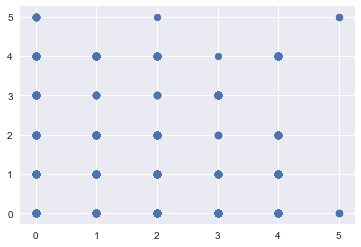

In [779]:
#plotting pick up boroughs vs drop off boroughs to see the inter vs intra borough traffic.
#diagonals give intra borough traffic whereas the other points give the inter borough traffic.
#we see "0" as one of the boroughs due to the null values because of the inaccuracy of the ranges of the latitudes and longitudes boundaries 
#  of boroughs taken roughly from google maps
plt.scatter(data['pickup_borough'],data['drop_borough'])